# QDM Frequency adaptation analysis

Here we will compare the performance of quantile delta mapping adjustments done for GCM precipitation data over the entire 4km ERA5 WRF domain, using different values for the `adapt_freq_thresh` parameter. This controls the threshold used for "frequency adaptation" as described by [Themeßl et al. 2012](https://doi.org/10.1007/s10584-011-0224-4) so that adjustment factors are less wet-biased.

In [1]:
# config cell
from pathlib import Path
import seaborn as sns
import xarray as xr

# tmp dir for where results have been precomputed
tmp_dir = Path("/center1/CMIP6/kmredilla/downscaling/eda")

In [2]:
ds = xr.open_zarr(tmp_dir.joinpath("adapt_freq_pridx_cvm_allmodels_historical.zarr"))

### Domain-wide boxplots of 2-sample Cramér–von Mises $p$-values for four different frequency adaptation thresholds

In [3]:
df = ds.to_dataframe().reset_index()[["model", "adapt_freq", "dpi_pval", "rx1day_pval"]]

df = df.melt(
    id_vars=["model", "adapt_freq"],
    value_vars=["rx1day_pval", "dpi_pval"],
    var_name="indicator",
    value_name="pval",
)

df["indicator"] = df["indicator"].str.replace("_pval", "")

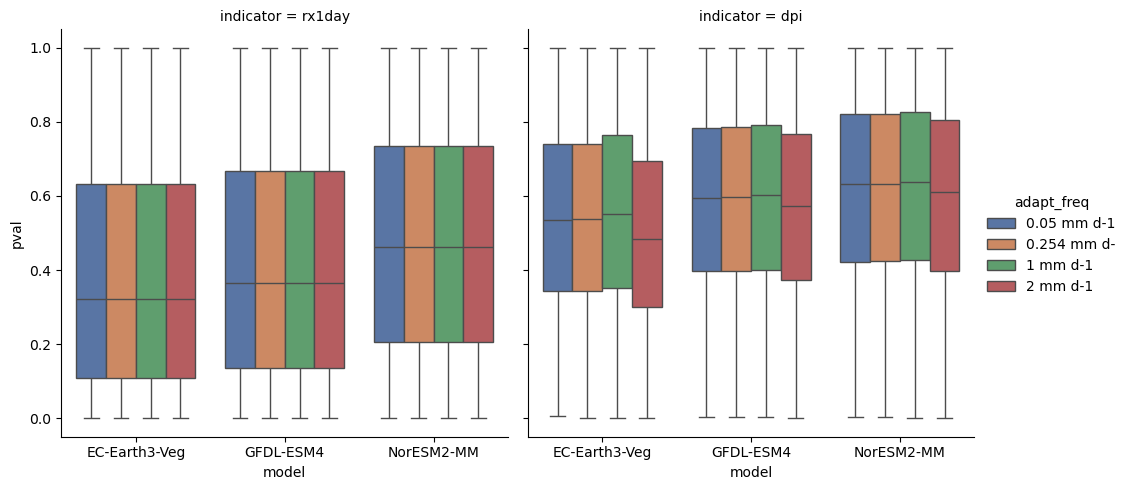

In [4]:
sns.catplot(
    df,
    x="model",
    col="indicator",
    y="pval",
    hue="adapt_freq",
    kind="box",
    palette="deep",
)